# Import library

In [268]:
import tensorflow as tf
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, LSTM
from keras.layers import Bidirectional, GlobalMaxPool1D
from keras.models import Model
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.layers import Input
from keras.layers.merge import Concatenate

import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt

In [2]:
# import training data
training_data = pd.read_csv('Training_newsdata.csv')

In [3]:
training_data.shape

(132175, 20)

In [4]:
training_data.head(2)

,Unnamed: 0,type,ไลฟ์สไตล์,เศรษฐกิจ,ต่างประเทศ,ความมั่นคง,สิ่งแวดล้อม,ผู้หญิง,การเมือง,แรงงาน,สังคม,อาชญากรรม,บันเทิง,สิทธิมนุษยชน,การศึกษา,วิทยาศาสตร์เทคโนโลยี,คุณภาพชีวิต,วัฒนธรรม,กีฬา,Tkn_Text
0,169629,"แรงงาน,คุณภาพชีวิต",0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,วัน ลูกจ้าง ทำงานบ้าน สากล เครือข่าย ลูกจ้าง ท...
1,128696,"ข่าว,เศรษฐกิจ",0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,นาย จัก รก ฤศฏิ์ พารา พันธ กุล รองประธานกรรมกา...


In [10]:
#import testing data
testing_data = pd.read_csv('testing_newsdata.csv')

In [6]:
testing_data.shape

(56647, 20)

In [7]:
testing_data.head(2)

,Unnamed: 0,type,ไลฟ์สไตล์,เศรษฐกิจ,ต่างประเทศ,ความมั่นคง,สิ่งแวดล้อม,ผู้หญิง,การเมือง,แรงงาน,สังคม,อาชญากรรม,บันเทิง,สิทธิมนุษยชน,การศึกษา,วิทยาศาสตร์เทคโนโลยี,คุณภาพชีวิต,วัฒนธรรม,กีฬา,Tkn_Text
0,19341,อาชญากรรม,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,วันนี้ ก พ นาย บุ ณย พงศ์ โพธิ วัฒน ์ธนัต ผู้อ...
1,185768,เศรษฐกิจ,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,ที่ประชุม คณะกรรมการ กิจการ โทร คม นาค มก ทค ม...


In [8]:
X_train = list(training_data["Tkn_Text"])

In [9]:
len(X_train)

132175

In [11]:
X_test = list(testing_data["Tkn_Text"])

In [12]:
len(X_test)

56647

In [13]:
y_train = training_data[['ไลฟ์สไตล์', 'เศรษฐกิจ', 'ต่างประเทศ', 'ความมั่นคง', 'สิ่งแวดล้อม', 'ผู้หญิง', 'การเมือง', 'แรงงาน', 'สังคม', 'อาชญากรรม', 'บันเทิง', 'สิทธิมนุษยชน', 'การศึกษา', 'วิทยาศาสตร์เทคโนโลยี', 'คุณภาพชีวิต', 'วัฒนธรรม', 'กีฬา']].values

In [14]:
y_train

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [15]:
y_train.shape

(132175, 17)

In [16]:
y_test = testing_data[['ไลฟ์สไตล์', 'เศรษฐกิจ', 'ต่างประเทศ', 'ความมั่นคง', 'สิ่งแวดล้อม', 'ผู้หญิง', 'การเมือง', 'แรงงาน', 'สังคม', 'อาชญากรรม', 'บันเทิง', 'สิทธิมนุษยชน', 'การศึกษา', 'วิทยาศาสตร์เทคโนโลยี', 'คุณภาพชีวิต', 'วัฒนธรรม', 'กีฬา']].values

In [17]:
y_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]], dtype=int64)

In [18]:
y_test.shape

(56647, 17)

In [ ]:
label = ['ไลฟ์สไตล์', 'เศรษฐกิจ', 'ต่างประเทศ', 'ความมั่นคง', 'สิ่งแวดล้อม', 'ผู้หญิง', 'การเมือง', 'แรงงาน', 'สังคม', 'อาชญากรรม', 'บันเทิง', 'สิทธิมนุษยชน', 'การศึกษา', 'วิทยาศาสตร์เทคโนโลยี', 'คุณภาพชีวิต', 'วัฒนธรรม', 'กีฬา']

In [19]:
tokenizer = Tokenizer(num_words=10000, oov_token = '<OOV>')
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

vocab_size = len(tokenizer.word_index) + 1

maxlen = 300

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

## Without pre-train embedding 

### - LTSM

Apporch 1

In [314]:
embedding_dim = 200
# The LSTM architecture
input_1 = Input(shape=(maxlen,))
embedding_layer = Embedding(vocab_size, embedding_dim)(input_1)
x = LSTM(units= 16)(embedding_layer)
#x = Dense(8, activation="relu")(lstm_1)
x = Dropout(0.25)(x)
dense_1 = Dense(17, activation = 'sigmoid')(x)
model_1 = Model(inputs=input_1, outputs=dense_1)
model_1.summary()

Model: "model_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_27 (InputLayer)        [(None, 300)]             0         
_________________________________________________________________
embedding_32 (Embedding)     (None, 300, 200)          30094200  
_________________________________________________________________
lstm_32 (LSTM)               (None, 16)                13888     
_________________________________________________________________
dropout_8 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_30 (Dense)             (None, 17)                289       
Total params: 30,108,377
Trainable params: 30,108,377
Non-trainable params: 0
_________________________________________________________________


In [315]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
lr_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)
es = EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=5,
                              verbose=0, mode='auto')

In [316]:
model_1.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
callbacks_list = [es, lr_reduction]

In [317]:
import time
start_time = time.time()

In [318]:
print('Start Time :', start_time )
history_1 = model_1.fit(X_train, y_train, batch_size=256, epochs=25, verbose=1, validation_split=0.2,callbacks=callbacks_list)
print('Consume time : ',(time.time() - start_time))

Start Time : 1624157774.5816238
Epoch 1/25
414/414 [==============================] - 73s 171ms/step - loss: 0.4091 - accuracy: 0.1242 - val_loss: 0.2303 - val_accuracy: 0.2360
Epoch 2/25
414/414 [==============================] - 71s 171ms/step - loss: 0.2373 - accuracy: 0.2230 - val_loss: 0.2196 - val_accuracy: 0.2387
Epoch 3/25
414/414 [==============================] - 71s 171ms/step - loss: 0.2292 - accuracy: 0.2375 - val_loss: 0.2159 - val_accuracy: 0.2474
Epoch 4/25
414/414 [==============================] - 71s 171ms/step - loss: 0.2206 - accuracy: 0.2503 - val_loss: 0.1999 - val_accuracy: 0.3875
Epoch 5/25
414/414 [==============================] - 71s 171ms/step - loss: 0.2020 - accuracy: 0.3774 - val_loss: 0.1699 - val_accuracy: 0.5482
Epoch 6/25
414/414 [==============================] - 71s 171ms/step - loss: 0.1726 - accuracy: 0.5350 - val_loss: 0.1422 - val_accuracy: 0.6419
Epoch 7/25
414/414 [==============================] - 71s 171ms/step - loss: 0.1517 - accuracy: 0.

In [479]:
score_1 = model_1.evaluate(X_test, y_test, verbose=1)

print("Test Score:", score_1[0])
print("Test Accuracy:", score_1[1])

1771/1771 [==============================] - 9s 5ms/step - loss: 0.1109 - accuracy: 0.7615
Test Score: 0.11089572310447693
Test Accuracy: 0.7615407705307007


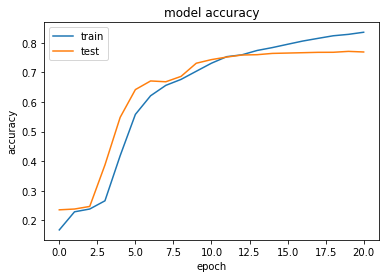

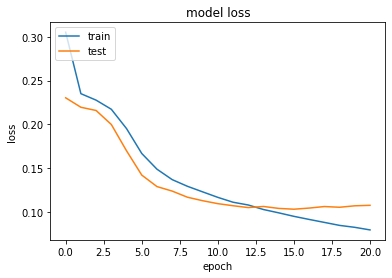

In [478]:
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [321]:
model_1.save('model_1.h5')

In [322]:
model_1.save_weights("model_1_weight.h5")

In [323]:
hist1_df = pd.DataFrame(history_1.history) 

In [325]:
hist1_df.to_csv("hist1_acc&loss.csv")

In [326]:
# Predict the label of the test_images
pred = model_1.predict(X_test)


# Map the label
#labels = (train_images.class_indices)
#labels = dict((v,k) for k,v in labels.items())
#pred = [labels[k] for k in pred]

In [327]:
pred_bool = (pred > 0.5)


In [328]:
predictions = pred_bool.astype(int)

In [336]:
predictions[4]

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [340]:
predictions

54003

In [330]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.80      0.65      0.72      2305
           1       0.77      0.64      0.70      5437
           2       0.87      0.83      0.85      6506
           3       0.00      0.00      0.00       653
           4       0.75      0.42      0.54      3168
           5       0.67      0.41      0.51      1261
           6       0.83      0.82      0.83     14636
           7       0.80      0.05      0.10       814
           8       0.73      0.43      0.54      8917
           9       0.82      0.77      0.79      5219
          10       0.92      0.87      0.90      3617
          11       0.55      0.37      0.44      3703
          12       0.00      0.00      0.00       701
          13       0.88      0.32      0.47      1847
          14       0.50      0.18      0.27      2812
          15       0.69      0.06      0.12      1141
          16       0.99      0.96      0.97      6587

   micro avg       0.82   

C:\Users\Cromagnon-PC\anaconda3\envs\tf2.4gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Cromagnon-PC\anaconda3\envs\tf2.4gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [492]:
Lstm_nopre_df =pd.DataFrame(predictions, columns = ['ไลฟ์สไตล์', 'เศรษฐกิจ', 'ต่างประเทศ', 'ความมั่นคง', 'สิ่งแวดล้อม', 'ผู้หญิง', 'การเมือง', 'แรงงาน', 'สังคม', 'อาชญากรรม', 'บันเทิง', 'สิทธิมนุษยชน', 'การศึกษา', 'วิทยาศาสตร์เทคโนโลยี', 'คุณภาพชีวิต', 'วัฒนธรรม', 'กีฬา'])

In [494]:
Lstm_nopre_df.to_csv("Predict_LSTM_nopretrain_ap1.csv")

Apporch 2

In [ ]:
# First output
y1_train =training_data[["ไลฟ์สไตล์"]].values
y1_test =  testing_data[["ไลฟ์สไตล์"]].values

# Second output
y2_train = training_data[["เศรษฐกิจ"]].values
y2_test =  testing_data[["เศรษฐกิจ"]].values

# Third output
y3_train = training_data[["ต่างประเทศ"]].values
y3_test =  testing_data[["ต่างประเทศ"]].values

# Fourth output
y4_train = training_data[["ความมั่นคง"]].values
y4_test =  testing_data[["ความมั่นคง"]].values

# Fifth output
y5_train = training_data[["สิ่งแวดล้อม"]].values
y5_test =  testing_data[["สิ่งแวดล้อม"]].values

# Sixth output
y6_train = training_data[["ผู้หญิง"]].values
y6_test =  testing_data[["ผู้หญิง"]].values

# 7th output
y7_train = training_data[["การเมือง"]].values
y7_test =  testing_data[["การเมือง"]].values

# 8th output
y8_train = training_data[["แรงงาน"]].values
y8_test =  testing_data[["แรงงาน"]].values

# 9th output
y9_train = training_data[["สังคม"]].values
y9_test =  testing_data[["สังคม"]].values

# 10th output
y10_train = training_data[["อาชญากรรม"]].values
y10_test =  testing_data[["อาชญากรรม"]].values

# 11th output
y11_train = training_data[["บันเทิง"]].values
y11_test =  testing_data[["บันเทิง"]].values

# 12th output
y12_train = training_data[["สิทธิมนุษยชน"]].values
y12_test =  testing_data[["สิทธิมนุษยชน"]].values

# 13th output
y13_train = training_data[["การศึกษา"]].values
y13_test =  testing_data[["การศึกษา"]].values

# 14th output
y14_train = training_data[["วิทยาศาสตร์เทคโนโลยี"]].values
y14_test =  testing_data[["วิทยาศาสตร์เทคโนโลยี"]].values

# 15th output
y15_train = training_data[["คุณภาพชีวิต"]].values
y15_test =  testing_data[["คุณภาพชีวิต"]].values

# 16th output
y16_train = training_data[["วัฒนธรรม"]].values
y16_test =  testing_data[["วัฒนธรรม"]].values

# 17th output
y17_train = training_data[["กีฬา"]].values
y17_test =  testing_data[["กีฬา"]].values

In [379]:
input_1 = Input(shape=(maxlen,))
embedding_layer = Embedding(vocab_size, embedding_dim)(input_1)
x = LSTM(32)(embedding_layer)
output1 = Dense(1, activation='sigmoid',name='Output_1')(x)
output2 = Dense(1, activation='sigmoid',name='Output_2')(x)
output3 = Dense(1, activation='sigmoid',name='Output_3')(x)
output4 = Dense(1, activation='sigmoid',name='Output_4')(x)
output5 = Dense(1, activation='sigmoid',name='Output_5')(x)
output6 = Dense(1, activation='sigmoid',name='Output_6')(x)
output7 = Dense(1, activation='sigmoid',name='Output_7')(x)
output8 = Dense(1, activation='sigmoid',name='Output_8')(x)
output9 = Dense(1, activation='sigmoid',name='Output_9')(x)
output10 = Dense(1, activation='sigmoid',name='Output_10')(x)
output11 = Dense(1, activation='sigmoid',name='Output_11')(x)
output12 = Dense(1, activation='sigmoid',name='Output_12')(x)
output13 = Dense(1, activation='sigmoid',name='Output_13')(x)
output14 = Dense(1, activation='sigmoid',name='Output_14')(x)
output15 = Dense(1, activation='sigmoid',name='Output_15')(x)
output16 = Dense(1, activation='sigmoid',name='Output_16')(x)
output17 = Dense(1, activation='sigmoid',name='Output_17')(x)

model_3 = Model(inputs=input_1, outputs=[output1, output2, output3, output4, output5, output6,output7,output8,output9,output10,output11,output12,output13,output14,output15,output16,output17])
model_3.summary()

Model: "model_25"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_33 (InputLayer)           [(None, 300)]        0                                            
__________________________________________________________________________________________________
embedding_38 (Embedding)        (None, 300, 200)     30094200    input_33[0][0]                   
__________________________________________________________________________________________________
lstm_38 (LSTM)                  (None, 32)           29824       embedding_38[0][0]               
__________________________________________________________________________________________________
Output_1 (Dense)                (None, 1)            33          lstm_38[0][0]                    
___________________________________________________________________________________________

In [380]:
model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [381]:
print('Start Time :', start_time )
history_3 = model_3.fit(x=X_train, y=[y1_train, y2_train, y3_train, y4_train, y5_train, y6_train, y7_train, y8_train, y9_train, y10_train, y11_train, y12_train, y13_train, y14_train, y15_train, y16_train, y17_train], batch_size=256, epochs=15, verbose=1, validation_split=0.2)
print('Consume time : ',(time.time() - start_time))

Start Time : 1624157774.5816238
Epoch 1/15
414/414 [==============================] - 85s 185ms/step - loss: 5.6481 - Output_1_loss: 0.2706 - Output_2_loss: 0.3868 - Output_3_loss: 0.4146 - Output_4_loss: 0.2761 - Output_5_loss: 0.3413 - Output_6_loss: 0.2151 - Output_7_loss: 0.5880 - Output_8_loss: 0.2188 - Output_9_loss: 0.5272 - Output_10_loss: 0.3666 - Output_11_loss: 0.3269 - Output_12_loss: 0.3321 - Output_13_loss: 0.2190 - Output_14_loss: 0.2357 - Output_15_loss: 0.2918 - Output_16_loss: 0.2006 - Output_17_loss: 0.4370 - Output_1_accuracy: 0.9333 - Output_2_accuracy: 0.8755 - Output_3_accuracy: 0.8734 - Output_4_accuracy: 0.9512 - Output_5_accuracy: 0.9310 - Output_6_accuracy: 0.9731 - Output_7_accuracy: 0.7303 - Output_8_accuracy: 0.9599 - Output_9_accuracy: 0.6913 - Output_10_accuracy: 0.9040 - Output_11_accuracy: 0.9222 - Output_12_accuracy: 0.8972 - Output_13_accuracy: 0.9547 - Output_14_accuracy: 0.9626 - Output_15_accuracy: 0.9398 - Output_16_accuracy: 0.9728 - Output_17_a

In [384]:
score_3 = model_3.evaluate(x=X_test, y=[y1_test, y2_test, y3_test, y4_test, y5_test, y6_test, y7_test, y8_test, y9_test, y10_test, y11_test, y12_test, y13_test, y14_test, y15_test, y16_test, y17_test], verbose=1)

1771/1771 [==============================] - 29s 16ms/step - loss: 1.8015 - Output_1_loss: 0.0746 - Output_2_loss: 0.1483 - Output_3_loss: 0.1185 - Output_4_loss: 0.0483 - Output_5_loss: 0.1120 - Output_6_loss: 0.0533 - Output_7_loss: 0.2429 - Output_8_loss: 0.0398 - Output_9_loss: 0.3038 - Output_10_loss: 0.1102 - Output_11_loss: 0.0445 - Output_12_loss: 0.1427 - Output_13_loss: 0.0494 - Output_14_loss: 0.0795 - Output_15_loss: 0.1422 - Output_16_loss: 0.0651 - Output_17_loss: 0.0264 - Output_1_accuracy: 0.9781 - Output_2_accuracy: 0.9478 - Output_3_accuracy: 0.9635 - Output_4_accuracy: 0.9885 - Output_5_accuracy: 0.9614 - Output_6_accuracy: 0.9830 - Output_7_accuracy: 0.9154 - Output_8_accuracy: 0.9885 - Output_9_accuracy: 0.8823 - Output_10_accuracy: 0.9649 - Output_11_accuracy: 0.9880 - Output_12_accuracy: 0.9435 - Output_13_accuracy: 0.9874 - Output_14_accuracy: 0.9779 - Output_15_accuracy: 0.9496 - Output_16_accuracy: 0.9801 - Output_17_accuracy: 0.9943


In [385]:
pred_3 = model_3.predict(X_test)

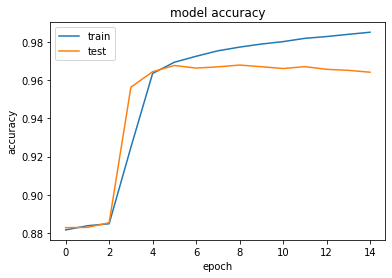

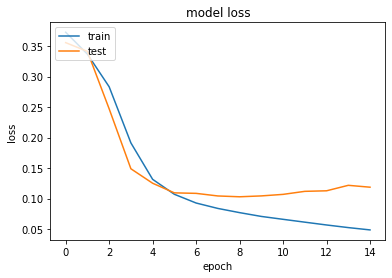

In [383]:
plt.plot(history_3.history['Output_3_accuracy'])
plt.plot(history_3.history['val_Output_3_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history_3.history['Output_3_loss'])
plt.plot(history_3.history['val_Output_3_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [386]:
dict_test_3 = {label[i] : [1 if k[0] >= 0.5 else 0 for k in pred_3[i] ] for i in range(len(label))}

In [387]:
pred_3_df = pd.DataFrame(dict_test_3)

In [400]:
predictions_3 = pred_3_df[['ไลฟ์สไตล์', 'เศรษฐกิจ', 'ต่างประเทศ', 'ความมั่นคง', 'สิ่งแวดล้อม', 'ผู้หญิง', 'การเมือง', 'แรงงาน', 'สังคม', 'อาชญากรรม', 'บันเทิง', 'สิทธิมนุษยชน', 'การศึกษา', 'วิทยาศาสตร์เทคโนโลยี', 'คุณภาพชีวิต', 'วัฒนธรรม', 'กีฬา']].values

In [401]:
print(classification_report(y_test, predictions_3))

              precision    recall  f1-score   support

           0       0.74      0.70      0.72      2305
           1       0.75      0.68      0.71      5437
           2       0.85      0.82      0.84      6506
           3       0.57      0.01      0.02       653
           4       0.67      0.61      0.64      3168
           5       0.63      0.56      0.59      1261
           6       0.86      0.81      0.83     14636
           7       0.67      0.39      0.50       814
           8       0.65      0.55      0.59      8917
           9       0.84      0.77      0.80      5219
          10       0.93      0.88      0.90      3617
          11       0.57      0.54      0.56      3703
          12       0.31      0.02      0.03       701
          13       0.76      0.47      0.58      1847
          14       0.49      0.30      0.37      2812
          15       0.51      0.28      0.36      1141
          16       0.98      0.97      0.98      6587

   micro avg       0.79   

C:\Users\Cromagnon-PC\anaconda3\envs\tf2.4gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Cromagnon-PC\anaconda3\envs\tf2.4gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [436]:
pred_3_df.to_csv("LSTM_Withoutpretrain_testing data.csv")

In [437]:
model_3.save('LSTM_Withoutpretrain_model.h5')
model_3.save_weights("LSTM_Withoutpretrain_weight.h5")

### - Bi-LSTM

Apporch 1

In [278]:
embedding_dim = 200
# The LSTM architecture
input_1 = Input(shape=(maxlen,))
embedding_layer = Embedding(vocab_size, embedding_dim)(input_1)
bilstm_1 = Bidirectional(LSTM(units= 32, return_sequences=True))(embedding_layer)
x = GlobalMaxPool1D()(bilstm_1)
x = Dense(34, activation="relu")(x)
x = Dropout(0.5)(x)
dense_1 = Dense(17, activation = 'sigmoid')(x)
model_2 = Model(inputs=input_1, outputs=dense_1)
model_2.summary()

Model: "model_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_18 (InputLayer)        [(None, 300)]             0         
_________________________________________________________________
embedding_23 (Embedding)     (None, 300, 200)          30094200  
_________________________________________________________________
bidirectional_4 (Bidirection (None, 300, 64)           59648     
_________________________________________________________________
global_max_pooling1d_3 (Glob (None, 64)                0         
_________________________________________________________________
dense_18 (Dense)             (None, 34)                2210      
_________________________________________________________________
dropout_3 (Dropout)          (None, 34)                0         
_________________________________________________________________
dense_19 (Dense)             (None, 17)                595

In [279]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
lr_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)
es = EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=5,
                              verbose=0, mode='auto')

In [280]:
model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
callbacks_list = [es, lr_reduction]

In [281]:
print('Start Time :', start_time )
history_2 = model_2.fit(X_train, y_train, batch_size=256, epochs=30, verbose=1, validation_split=0.2,callbacks=callbacks_list)
print('Consume time : ',(time.time() - start_time))

Start Time : 1624131866.6119936
Epoch 1/30
414/414 [==============================] - 76s 176ms/step - loss: 0.3723 - accuracy: 0.1416 - val_loss: 0.1503 - val_accuracy: 0.6256
Epoch 2/30
414/414 [==============================] - 73s 177ms/step - loss: 0.1624 - accuracy: 0.5829 - val_loss: 0.1140 - val_accuracy: 0.7362
Epoch 3/30
414/414 [==============================] - 73s 177ms/step - loss: 0.1304 - accuracy: 0.6910 - val_loss: 0.1029 - val_accuracy: 0.7582
Epoch 4/30
414/414 [==============================] - 74s 178ms/step - loss: 0.1163 - accuracy: 0.7287 - val_loss: 0.0984 - val_accuracy: 0.7660
Epoch 5/30
414/414 [==============================] - 73s 177ms/step - loss: 0.1089 - accuracy: 0.7490 - val_loss: 0.0999 - val_accuracy: 0.7640
Epoch 6/30
414/414 [==============================] - 73s 178ms/step - loss: 0.1035 - accuracy: 0.7648 - val_loss: 0.0953 - val_accuracy: 0.7873
Epoch 7/30
414/414 [==============================] - 74s 178ms/step - loss: 0.0972 - accuracy: 0.

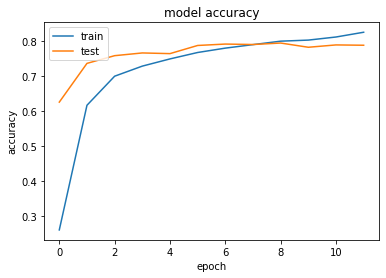

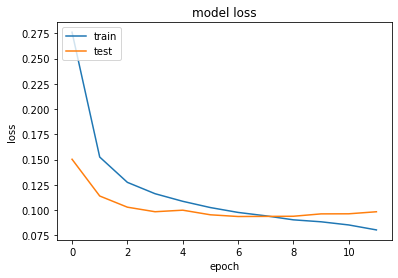

In [422]:
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [495]:
score_2 = model_2.evaluate(X_test, y_test, verbose=1)

print("Test Score:", score_2[0])
print("Test Accuracy:", score_2[1])

1771/1771 [==============================] - 16s 9ms/step - loss: 0.1013 - accuracy: 0.7823
Test Score: 0.10132274776697159
Test Accuracy: 0.7822832465171814


In [287]:
model_2.save('model_2.h5')

In [288]:
model_2.save_weights("model_2_weight.h5")

In [343]:
hist2_df = pd.DataFrame(history_2.history) 

In [344]:
hist2_df.to_csv("hist2_acc&loss.csv")

In [424]:
pred_2 = model_2.predict(X_test)

In [425]:
pred2_bool = (pred_2 > 0.5)
predictions_2 = pred2_bool.astype(int)

In [496]:
predictions_2

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]])

In [426]:
print(classification_report(y_test, predictions_2))

              precision    recall  f1-score   support

           0       0.86      0.68      0.76      2305
           1       0.80      0.64      0.71      5437
           2       0.91      0.82      0.86      6506
           3       0.00      0.00      0.00       653
           4       0.79      0.47      0.59      3168
           5       0.73      0.48      0.58      1261
           6       0.88      0.80      0.84     14636
           7       0.00      0.00      0.00       814
           8       0.72      0.49      0.58      8917
           9       0.87      0.76      0.81      5219
          10       0.93      0.91      0.92      3617
          11       0.71      0.22      0.33      3703
          12       0.00      0.00      0.00       701
          13       0.92      0.31      0.46      1847
          14       0.46      0.01      0.01      2812
          15       0.00      0.00      0.00      1141
          16       0.99      0.97      0.98      6587

   micro avg       0.86   

C:\Users\Cromagnon-PC\anaconda3\envs\tf2.4gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Cromagnon-PC\anaconda3\envs\tf2.4gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Cromagnon-PC\anaconda3\envs\tf2.4gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [498]:
Bi_Lstm_nopre_df =pd.DataFrame(predictions_2, columns = ['ไลฟ์สไตล์', 'เศรษฐกิจ', 'ต่างประเทศ', 'ความมั่นคง', 'สิ่งแวดล้อม', 'ผู้หญิง', 'การเมือง', 'แรงงาน', 'สังคม', 'อาชญากรรม', 'บันเทิง', 'สิทธิมนุษยชน', 'การศึกษา', 'วิทยาศาสตร์เทคโนโลยี', 'คุณภาพชีวิต', 'วัฒนธรรม', 'กีฬา'])

In [502]:
Bi_Lstm_nopre_df.to_csv("Bi-lstm_nopre.csv")

Apporch 2

In [390]:
input_1 = Input(shape=(maxlen,))
embedding_layer = Embedding(vocab_size, embedding_dim)(input_1)
bilstm_1 = Bidirectional(LSTM(units= 32, return_sequences=True))(embedding_layer)
x = GlobalMaxPool1D()(bilstm_1)
x = Dense(34, activation="relu")(x)
x = Dropout(0.5)(x)

output1 = Dense(1, activation='sigmoid',name='Output_1')(x)
output2 = Dense(1, activation='sigmoid',name='Output_2')(x)
output3 = Dense(1, activation='sigmoid',name='Output_3')(x)
output4 = Dense(1, activation='sigmoid',name='Output_4')(x)
output5 = Dense(1, activation='sigmoid',name='Output_5')(x)
output6 = Dense(1, activation='sigmoid',name='Output_6')(x)
output7 = Dense(1, activation='sigmoid',name='Output_7')(x)
output8 = Dense(1, activation='sigmoid',name='Output_8')(x)
output9 = Dense(1, activation='sigmoid',name='Output_9')(x)
output10 = Dense(1, activation='sigmoid',name='Output_10')(x)
output11 = Dense(1, activation='sigmoid',name='Output_11')(x)
output12 = Dense(1, activation='sigmoid',name='Output_12')(x)
output13 = Dense(1, activation='sigmoid',name='Output_13')(x)
output14 = Dense(1, activation='sigmoid',name='Output_14')(x)
output15 = Dense(1, activation='sigmoid',name='Output_15')(x)
output16 = Dense(1, activation='sigmoid',name='Output_16')(x)
output17 = Dense(1, activation='sigmoid',name='Output_17')(x)

model_4 = Model(inputs=input_1, outputs=[output1, output2, output3, output4, output5, output6,output7,output8,output9,output10,output11,output12,output13,output14,output15,output16,output17])
model_4.summary()

Model: "model_26"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_34 (InputLayer)           [(None, 300)]        0                                            
__________________________________________________________________________________________________
embedding_39 (Embedding)        (None, 300, 200)     30094200    input_34[0][0]                   
__________________________________________________________________________________________________
bidirectional_5 (Bidirectional) (None, 300, 64)      59648       embedding_39[0][0]               
__________________________________________________________________________________________________
global_max_pooling1d_10 (Global (None, 64)           0           bidirectional_5[0][0]            
___________________________________________________________________________________________

In [391]:
model_4.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [392]:
print('Start Time :', start_time )
history_4 = model_4.fit(x=X_train, y=[y1_train, y2_train, y3_train, y4_train, y5_train, y6_train, y7_train, y8_train, y9_train, y10_train, y11_train, y12_train, y13_train, y14_train, y15_train, y16_train, y17_train], batch_size=256, epochs=15, verbose=1, validation_split=0.2)
print('Consume time : ',(time.time() - start_time))

Start Time : 1624157774.5816238
Epoch 1/15
414/414 [==============================] - 91s 199ms/step - loss: 6.0901 - Output_1_loss: 0.4016 - Output_2_loss: 0.4311 - Output_3_loss: 0.4487 - Output_4_loss: 0.2523 - Output_5_loss: 0.3516 - Output_6_loss: 0.2761 - Output_7_loss: 0.6037 - Output_8_loss: 0.1921 - Output_9_loss: 0.5129 - Output_10_loss: 0.4775 - Output_11_loss: 0.3683 - Output_12_loss: 0.3617 - Output_13_loss: 0.1895 - Output_14_loss: 0.2866 - Output_15_loss: 0.3128 - Output_16_loss: 0.2444 - Output_17_loss: 0.3790 - Output_1_accuracy: 0.7792 - Output_2_accuracy: 0.8524 - Output_3_accuracy: 0.8370 - Output_4_accuracy: 0.9304 - Output_5_accuracy: 0.8867 - Output_6_accuracy: 0.8875 - Output_7_accuracy: 0.6945 - Output_8_accuracy: 0.9749 - Output_9_accuracy: 0.8198 - Output_10_accuracy: 0.7190 - Output_11_accuracy: 0.8786 - Output_12_accuracy: 0.8925 - Output_13_accuracy: 0.9784 - Output_14_accuracy: 0.9182 - Output_15_accuracy: 0.9147 - Output_16_accuracy: 0.9662 - Output_17_a

In [393]:
score_4 = model_4.evaluate(x=X_test, y=[y1_test, y2_test, y3_test, y4_test, y5_test, y6_test, y7_test, y8_test, y9_test, y10_test, y11_test, y12_test, y13_test, y14_test, y15_test, y16_test, y17_test], verbose=1)

1771/1771 [==============================] - 39s 22ms/step - loss: 1.9185 - Output_1_loss: 0.0799 - Output_2_loss: 0.1600 - Output_3_loss: 0.1233 - Output_4_loss: 0.0508 - Output_5_loss: 0.1222 - Output_6_loss: 0.0596 - Output_7_loss: 0.2388 - Output_8_loss: 0.0478 - Output_9_loss: 0.3132 - Output_10_loss: 0.1387 - Output_11_loss: 0.0421 - Output_12_loss: 0.1574 - Output_13_loss: 0.0537 - Output_14_loss: 0.0783 - Output_15_loss: 0.1515 - Output_16_loss: 0.0679 - Output_17_loss: 0.0334 - Output_1_accuracy: 0.9814 - Output_2_accuracy: 0.9506 - Output_3_accuracy: 0.9676 - Output_4_accuracy: 0.9885 - Output_5_accuracy: 0.9642 - Output_6_accuracy: 0.9847 - Output_7_accuracy: 0.9187 - Output_8_accuracy: 0.9880 - Output_9_accuracy: 0.8888 - Output_10_accuracy: 0.9641 - Output_11_accuracy: 0.9898 - Output_12_accuracy: 0.9456 - Output_13_accuracy: 0.9876 - Output_14_accuracy: 0.9782 - Output_15_accuracy: 0.9515 - Output_16_accuracy: 0.9799 - Output_17_accuracy: 0.9943


In [394]:
pred_4 = model_4.predict(X_test)

In [395]:
dict_test_4 = {label[i] : [1 if k[0] >= 0.5 else 0 for k in pred_4[i] ] for i in range(len(label))}

In [396]:
pred_4_df = pd.DataFrame(dict_test_4)

In [397]:
predictions_4 = pred_4_df[['ไลฟ์สไตล์', 'เศรษฐกิจ', 'ต่างประเทศ', 'ความมั่นคง', 'สิ่งแวดล้อม', 'ผู้หญิง', 'การเมือง', 'แรงงาน', 'สังคม', 'อาชญากรรม', 'บันเทิง', 'สิทธิมนุษยชน', 'การศึกษา', 'วิทยาศาสตร์เทคโนโลยี', 'คุณภาพชีวิต', 'วัฒนธรรม', 'กีฬา']].values

In [398]:
print(classification_report(y_test, predictions_4))

              precision    recall  f1-score   support

           0       0.84      0.67      0.75      2305
           1       0.81      0.64      0.71      5437
           2       0.91      0.80      0.85      6506
           3       0.00      0.00      0.00       653
           4       0.74      0.55      0.63      3168
           5       0.72      0.51      0.60      1261
           6       0.85      0.83      0.84     14636
           7       0.83      0.21      0.33       814
           8       0.73      0.46      0.57      8917
           9       0.83      0.77      0.80      5219
          10       0.94      0.89      0.92      3617
          11       0.66      0.35      0.46      3703
          12       0.00      0.00      0.00       701
          13       0.86      0.39      0.54      1847
          14       0.56      0.10      0.17      2812
          15       0.00      0.00      0.00      1141
          16       0.98      0.97      0.98      6587

   micro avg       0.84   

C:\Users\Cromagnon-PC\anaconda3\envs\tf2.4gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Cromagnon-PC\anaconda3\envs\tf2.4gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Cromagnon-PC\anaconda3\envs\tf2.4gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


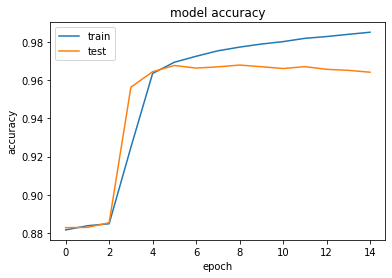

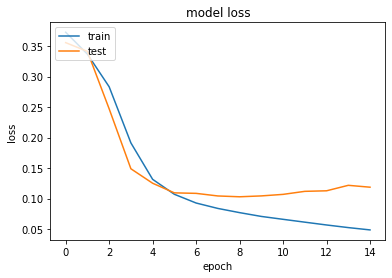

In [399]:
plt.plot(history_4.history['Output_3_accuracy'])
plt.plot(history_4.history['val_Output_3_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history_4.history['Output_3_loss'])
plt.plot(history_4.history['val_Output_3_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [438]:
pred_4_df.to_csv("Bi-LSTM_Withoutpretrain_testing data.csv")

In [439]:
model_4.save('Bi-LSTM_Withoutpretrain_model.h5')
model_4.save_weights("Bi-LSTM_Withoutpretrain_weight.h5")

# Glove pretrain

In [403]:
from tqdm import tqdm
embedding_vector = {}
f = open('glove.840B.300d.txt', encoding="utf8")
for line in tqdm(f):
    value = line.split(' ')
    word = value[0]
    coef = np.array(value[1:],dtype = 'float32')
    embedding_vector[word] = coef

2196018it [02:13, 16439.79it/s]


In [405]:
embedding_matrix = np.zeros((vocab_size,300))
for word,i in tqdm(tokenizer.word_index.items()):
    embedding_value = embedding_vector.get(word)
    if embedding_value is not None:
        embedding_matrix[i] = embedding_value

100%|██████████████████████████████████████████████████████████████████████| 150470/150470 [00:00<00:00, 828872.68it/s]


### - LSTM

Apporch 1

In [432]:
# The LSTM architecture
input_1 = Input(shape=(maxlen,))
embedding_layer = Embedding(vocab_size, 300, weights=[embedding_matrix], trainable=False)(input_1)
x = LSTM(units= 16)(embedding_layer)
#x = Dense(8, activation="relu")(lstm_1)
x = Dropout(0.25)(x)
dense_1 = Dense(17, activation = 'sigmoid')(x)
model_8 = Model(inputs=input_1, outputs=dense_1)
model_8.summary()

Model: "model_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_40 (InputLayer)        [(None, 300)]             0         
_________________________________________________________________
embedding_44 (Embedding)     (None, 300, 300)          45141300  
_________________________________________________________________
lstm_43 (LSTM)               (None, 16)                20288     
_________________________________________________________________
dropout_15 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_37 (Dense)             (None, 17)                289       
Total params: 45,161,877
Trainable params: 20,577
Non-trainable params: 45,141,300
_________________________________________________________________


In [433]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
lr_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)
es = EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=5,
                              verbose=0, mode='auto')

In [434]:
model_8.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
callbacks_list = [es, lr_reduction]

In [435]:
print('Start Time :', start_time )
history_8 = model_8.fit(X_train, y_train, batch_size=256, epochs=30, verbose=1, validation_split=0.2,callbacks=callbacks_list)
print('Consume time : ',(time.time() - start_time))

Start Time : 1624157774.5816238
Epoch 1/30
414/414 [==============================] - 15s 32ms/step - loss: 0.4166 - accuracy: 0.1505 - val_loss: 0.2310 - val_accuracy: 0.2363
Epoch 2/30
414/414 [==============================] - 13s 30ms/step - loss: 0.2400 - accuracy: 0.2235 - val_loss: 0.2301 - val_accuracy: 0.2365
Epoch 3/30
414/414 [==============================] - 12s 29ms/step - loss: 0.2371 - accuracy: 0.2279 - val_loss: 0.2298 - val_accuracy: 0.2363
Epoch 4/30
414/414 [==============================] - 12s 29ms/step - loss: 0.2358 - accuracy: 0.2348 - val_loss: 0.2294 - val_accuracy: 0.2409
Epoch 5/30
414/414 [==============================] - 12s 28ms/step - loss: 0.2351 - accuracy: 0.2391 - val_loss: 0.2289 - val_accuracy: 0.2420
Epoch 6/30
414/414 [==============================] - 12s 29ms/step - loss: 0.2338 - accuracy: 0.2415 - val_loss: 0.2285 - val_accuracy: 0.2421
Epoch 7/30
414/414 [==============================] - 13s 31ms/step - loss: 0.2326 - accuracy: 0.2404 - 

Apporch 2

In [503]:

# The LSTM architecture
input_1 = Input(shape=(maxlen,))
embedding_layer = Embedding(vocab_size, 300, weights=[embedding_matrix], trainable=False)(input_1)
x = LSTM(32)(embedding_layer)
output1 = Dense(1, activation='sigmoid')(x)
output2 = Dense(1, activation='sigmoid')(x)
output3 = Dense(1, activation='sigmoid')(x)
output4 = Dense(1, activation='sigmoid')(x)
output5 = Dense(1, activation='sigmoid')(x)
output6 = Dense(1, activation='sigmoid')(x)
output7 = Dense(1, activation='sigmoid')(x)
output8 = Dense(1, activation='sigmoid')(x)
output9 = Dense(1, activation='sigmoid')(x)
output10 = Dense(1, activation='sigmoid')(x)
output11 = Dense(1, activation='sigmoid')(x)
output12 = Dense(1, activation='sigmoid')(x)
output13 = Dense(1, activation='sigmoid')(x)
output14 = Dense(1, activation='sigmoid')(x)
output15 = Dense(1, activation='sigmoid')(x)
output16 = Dense(1, activation='sigmoid')(x)
output17 = Dense(1, activation='sigmoid')(x)

model_5 = Model(inputs=input_1, outputs=[output1, output2, output3, output4, output5, output6,output7,output8,output9,output10,output11,output12,output13,output14,output15,output16,output17])
model_5.summary()

Model: "model_32"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_42 (InputLayer)           [(None, 300)]        0                                            
__________________________________________________________________________________________________
embedding_46 (Embedding)        (None, 300, 300)     45141300    input_42[0][0]                   
__________________________________________________________________________________________________
lstm_45 (LSTM)                  (None, 32)           42624       embedding_46[0][0]               
__________________________________________________________________________________________________
dense_55 (Dense)                (None, 1)            33          lstm_45[0][0]                    
___________________________________________________________________________________________

In [504]:
model_5.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [505]:
print('Start Time :', start_time )
history_5 = model_5.fit(x=X_train, y=[y1_train, y2_train, y3_train, y4_train, y5_train, y6_train, y7_train, y8_train, y9_train, y10_train, y11_train, y12_train, y13_train, y14_train, y15_train, y16_train, y17_train], batch_size=256, epochs=15, verbose=1, validation_split=0.2)
print('Consume time : ',(time.time() - start_time))

Start Time : 1624157774.5816238
Epoch 1/15
414/414 [==============================] - 29s 53ms/step - loss: 6.1152 - dense_55_loss: 0.2701 - dense_56_loss: 0.4185 - dense_57_loss: 0.4244 - dense_58_loss: 0.1975 - dense_59_loss: 0.3708 - dense_60_loss: 0.3082 - dense_61_loss: 0.6241 - dense_62_loss: 0.2454 - dense_63_loss: 0.5255 - dense_64_loss: 0.3842 - dense_65_loss: 0.3834 - dense_66_loss: 0.3637 - dense_67_loss: 0.2491 - dense_68_loss: 0.2679 - dense_69_loss: 0.3964 - dense_70_loss: 0.2329 - dense_71_loss: 0.4530 - dense_55_accuracy: 0.9622 - dense_56_accuracy: 0.9014 - dense_57_accuracy: 0.8838 - dense_58_accuracy: 0.9874 - dense_59_accuracy: 0.9381 - dense_60_accuracy: 0.7503 - dense_61_accuracy: 0.5965 - dense_62_accuracy: 0.9844 - dense_63_accuracy: 0.7088 - dense_64_accuracy: 0.9059 - dense_65_accuracy: 0.9338 - dense_66_accuracy: 0.9300 - dense_67_accuracy: 0.9841 - dense_68_accuracy: 0.9677 - dense_69_accuracy: 0.8230 - dense_70_accuracy: 0.9798 - dense_71_accuracy: 0.8802 -

In [410]:
score_5 = model_5.evaluate(x=X_test, y=[y1_test, y2_test, y3_test, y4_test, y5_test, y6_test, y7_test, y8_test, y9_test, y10_test, y11_test, y12_test, y13_test, y14_test, y15_test, y16_test, y17_test], verbose=1)

1771/1771 [==============================] - 29s 17ms/step - loss: 3.7938 - Output_1_loss: 0.1488 - Output_2_loss: 0.3074 - Output_3_loss: 0.3418 - Output_4_loss: 0.0622 - Output_5_loss: 0.2115 - Output_6_loss: 0.0947 - Output_7_loss: 0.5602 - Output_8_loss: 0.0729 - Output_9_loss: 0.4323 - Output_10_loss: 0.2986 - Output_11_loss: 0.2249 - Output_12_loss: 0.2292 - Output_13_loss: 0.0659 - Output_14_loss: 0.1088 - Output_15_loss: 0.1944 - Output_16_loss: 0.0963 - Output_17_loss: 0.3439 - Output_1_accuracy: 0.9616 - Output_2_accuracy: 0.9044 - Output_3_accuracy: 0.8892 - Output_4_accuracy: 0.9885 - Output_5_accuracy: 0.9441 - Output_6_accuracy: 0.9784 - Output_7_accuracy: 0.7419 - Output_8_accuracy: 0.9856 - Output_9_accuracy: 0.8426 - Output_10_accuracy: 0.9079 - Output_11_accuracy: 0.9372 - Output_12_accuracy: 0.9350 - Output_13_accuracy: 0.9876 - Output_14_accuracy: 0.9742 - Output_15_accuracy: 0.9504 - Output_16_accuracy: 0.9799 - Output_17_accuracy: 0.8862


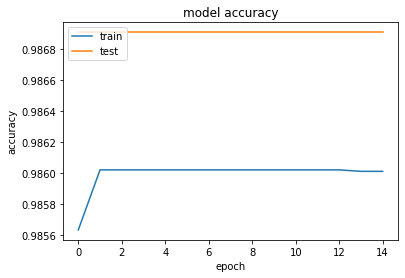

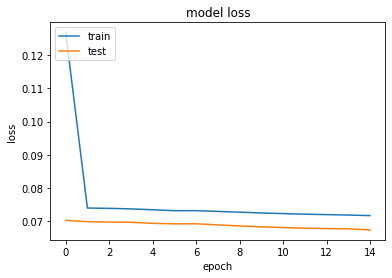

In [507]:
plt.plot(history_5.history['dense_62_accuracy'])
plt.plot(history_5.history['val_dense_62_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history_5.history['dense_62_loss'])
plt.plot(history_5.history['val_dense_62_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [508]:
pred_5 = model_4.predict(X_test)
dict_test_5 = {label[i] : [1 if k[0] >= 0.5 else 0 for k in pred_5[i] ] for i in range(len(label))}
pred_5_df = pd.DataFrame(dict_test_5)
predictions_5 = pred_5_df[['ไลฟ์สไตล์', 'เศรษฐกิจ', 'ต่างประเทศ', 'ความมั่นคง', 'สิ่งแวดล้อม', 'ผู้หญิง', 'การเมือง', 'แรงงาน', 'สังคม', 'อาชญากรรม', 'บันเทิง', 'สิทธิมนุษยชน', 'การศึกษา', 'วิทยาศาสตร์เทคโนโลยี', 'คุณภาพชีวิต', 'วัฒนธรรม', 'กีฬา']].values

In [509]:
print(classification_report(y_test, predictions_5))

              precision    recall  f1-score   support

           0       0.84      0.67      0.75      2305
           1       0.81      0.64      0.71      5437
           2       0.91      0.80      0.85      6506
           3       0.00      0.00      0.00       653
           4       0.74      0.55      0.63      3168
           5       0.72      0.51      0.60      1261
           6       0.85      0.83      0.84     14636
           7       0.83      0.21      0.33       814
           8       0.73      0.46      0.57      8917
           9       0.83      0.77      0.80      5219
          10       0.94      0.89      0.92      3617
          11       0.66      0.35      0.46      3703
          12       0.00      0.00      0.00       701
          13       0.86      0.39      0.54      1847
          14       0.56      0.10      0.17      2812
          15       0.00      0.00      0.00      1141
          16       0.98      0.97      0.98      6587

   micro avg       0.84   

C:\Users\Cromagnon-PC\anaconda3\envs\tf2.4gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Cromagnon-PC\anaconda3\envs\tf2.4gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Cromagnon-PC\anaconda3\envs\tf2.4gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [511]:
pred_5_df.to_csv("LSTM_Glove_testing data_new.csv")

In [441]:
model_5.save('LSTM_Glove_model.h5')
model_5.save_weights("LSTM_Glove_weight.h5")

## - Bi - LSTM

Apporch 1

In [427]:
input_1 = Input(shape=(maxlen,))
embedding_layer = Embedding(vocab_size, 300, weights=[embedding_matrix], trainable=False)(input_1)
bilstm_1 = Bidirectional(LSTM(units= 32, return_sequences=True))(embedding_layer)
x = GlobalMaxPool1D()(bilstm_1)
x = Dense(34, activation="relu")(x)
x = Dropout(0.5)(x)
dense_1 = Dense(17, activation = 'sigmoid')(x)
model_7 = Model(inputs=input_1, outputs=dense_1)
model_7.summary()

Model: "model_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_39 (InputLayer)        [(None, 300)]             0         
_________________________________________________________________
embedding_43 (Embedding)     (None, 300, 300)          45141300  
_________________________________________________________________
bidirectional_7 (Bidirection (None, 300, 64)           85248     
_________________________________________________________________
global_max_pooling1d_12 (Glo (None, 64)                0         
_________________________________________________________________
dense_35 (Dense)             (None, 34)                2210      
_________________________________________________________________
dropout_14 (Dropout)         (None, 34)                0         
_________________________________________________________________
dense_36 (Dense)             (None, 17)                595

In [428]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
lr_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)
es = EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=5,
                              verbose=0, mode='auto')

In [430]:
model_7.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [431]:
print('Start Time :', start_time )
history_7 = model_7.fit(X_train, y_train, batch_size=256, epochs=30, verbose=1, validation_split=0.2,callbacks=callbacks_list)
print('Consume time : ',(time.time() - start_time))

Start Time : 1624157774.5816238
Epoch 1/30
414/414 [==============================] - 26s 54ms/step - loss: 0.4085 - accuracy: 0.1041 - val_loss: 0.2291 - val_accuracy: 0.2361
Epoch 2/30
414/414 [==============================] - 22s 53ms/step - loss: 0.2512 - accuracy: 0.2243 - val_loss: 0.2277 - val_accuracy: 0.2393
Epoch 3/30
414/414 [==============================] - 23s 56ms/step - loss: 0.2441 - accuracy: 0.2402 - val_loss: 0.2261 - val_accuracy: 0.2480
Epoch 4/30
414/414 [==============================] - 20s 49ms/step - loss: 0.2408 - accuracy: 0.2423 - val_loss: 0.2256 - val_accuracy: 0.2493
Epoch 5/30
414/414 [==============================] - 21s 52ms/step - loss: 0.2370 - accuracy: 0.2490 - val_loss: 0.2245 - val_accuracy: 0.2533
Epoch 6/30
414/414 [==============================] - 22s 52ms/step - loss: 0.2360 - accuracy: 0.2481 - val_loss: 0.2237 - val_accuracy: 0.2544
Epoch 7/30
414/414 [==============================] - 22s 53ms/step - loss: 0.2340 - accuracy: 0.2531 - 

Apporch 2

In [512]:
input_1 = Input(shape=(maxlen,))
embedding_layer = Embedding(vocab_size, 300, weights=[embedding_matrix], trainable=False)(input_1)
bilstm_1 = Bidirectional(LSTM(units= 32, return_sequences=True))(embedding_layer)
x = GlobalMaxPool1D()(bilstm_1)
x = Dense(34, activation="relu")(x)
x = Dropout(0.5)(x)
output1 = Dense(1, activation='sigmoid')(x)
output2 = Dense(1, activation='sigmoid')(x)
output3 = Dense(1, activation='sigmoid')(x)
output4 = Dense(1, activation='sigmoid')(x)
output5 = Dense(1, activation='sigmoid')(x)
output6 = Dense(1, activation='sigmoid')(x)
output7 = Dense(1, activation='sigmoid')(x)
output8 = Dense(1, activation='sigmoid')(x)
output9 = Dense(1, activation='sigmoid')(x)
output10 = Dense(1, activation='sigmoid')(x)
output11 = Dense(1, activation='sigmoid')(x)
output12 = Dense(1, activation='sigmoid')(x)
output13 = Dense(1, activation='sigmoid')(x)
output14 = Dense(1, activation='sigmoid')(x)
output15 = Dense(1, activation='sigmoid')(x)
output16 = Dense(1, activation='sigmoid')(x)
output17 = Dense(1, activation='sigmoid')(x)

model_6 = Model(inputs=input_1, outputs=[output1, output2, output3, output4, output5, output6,output7,output8,output9,output10,output11,output12,output13,output14,output15,output16,output17])
model_6.summary()

Model: "model_33"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_43 (InputLayer)           [(None, 300)]        0                                            
__________________________________________________________________________________________________
embedding_47 (Embedding)        (None, 300, 300)     45141300    input_43[0][0]                   
__________________________________________________________________________________________________
bidirectional_8 (Bidirectional) (None, 300, 64)      85248       embedding_47[0][0]               
__________________________________________________________________________________________________
global_max_pooling1d_13 (Global (None, 64)           0           bidirectional_8[0][0]            
___________________________________________________________________________________________

In [513]:
model_6.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [514]:
print('Start Time :', start_time )
history_6 = model_6.fit(x=X_train, y=[y1_train, y2_train, y3_train, y4_train, y5_train, y6_train, y7_train, y8_train, y9_train, y10_train, y11_train, y12_train, y13_train, y14_train, y15_train, y16_train, y17_train], batch_size=256, epochs=15, verbose=1, validation_split=0.2)
print('Consume time : ',(time.time() - start_time))

Start Time : 1624157774.5816238
Epoch 1/15
414/414 [==============================] - 45s 84ms/step - loss: 6.8057 - dense_73_loss: 0.3280 - dense_74_loss: 0.4451 - dense_75_loss: 0.4868 - dense_76_loss: 0.3032 - dense_77_loss: 0.3745 - dense_78_loss: 0.2953 - dense_79_loss: 0.7094 - dense_80_loss: 0.2582 - dense_81_loss: 0.5300 - dense_82_loss: 0.4240 - dense_83_loss: 0.4032 - dense_84_loss: 0.3729 - dense_85_loss: 0.3140 - dense_86_loss: 0.4420 - dense_87_loss: 0.3458 - dense_88_loss: 0.2837 - dense_89_loss: 0.4898 - dense_73_accuracy: 0.9247 - dense_74_accuracy: 0.8836 - dense_75_accuracy: 0.8296 - dense_76_accuracy: 0.8990 - dense_77_accuracy: 0.9076 - dense_78_accuracy: 0.9408 - dense_79_accuracy: 0.5711 - dense_80_accuracy: 0.9712 - dense_81_accuracy: 0.8205 - dense_82_accuracy: 0.8886 - dense_83_accuracy: 0.8847 - dense_84_accuracy: 0.9263 - dense_85_accuracy: 0.8830 - dense_86_accuracy: 0.7653 - dense_87_accuracy: 0.9306 - dense_88_accuracy: 0.9559 - dense_89_accuracy: 0.8498 -

In [418]:
score_6 = model_6.evaluate(x=X_test, y=[y1_test, y2_test, y3_test, y4_test, y5_test, y6_test, y7_test, y8_test, y9_test, y10_test, y11_test, y12_test, y13_test, y14_test, y15_test, y16_test, y17_test], verbose=1)

1771/1771 [==============================] - 40s 23ms/step - loss: 3.7722 - Output_1_loss: 0.1463 - Output_2_loss: 0.3055 - Output_3_loss: 0.3408 - Output_4_loss: 0.0621 - Output_5_loss: 0.2113 - Output_6_loss: 0.0931 - Output_7_loss: 0.5591 - Output_8_loss: 0.0723 - Output_9_loss: 0.4320 - Output_10_loss: 0.2967 - Output_11_loss: 0.2230 - Output_12_loss: 0.2288 - Output_13_loss: 0.0654 - Output_14_loss: 0.1070 - Output_15_loss: 0.1932 - Output_16_loss: 0.0955 - Output_17_loss: 0.3400 - Output_1_accuracy: 0.9617 - Output_2_accuracy: 0.9041 - Output_3_accuracy: 0.8878 - Output_4_accuracy: 0.9885 - Output_5_accuracy: 0.9441 - Output_6_accuracy: 0.9784 - Output_7_accuracy: 0.7416 - Output_8_accuracy: 0.9856 - Output_9_accuracy: 0.8426 - Output_10_accuracy: 0.9079 - Output_11_accuracy: 0.9371 - Output_12_accuracy: 0.9347 - Output_13_accuracy: 0.9876 - Output_14_accuracy: 0.9744 - Output_15_accuracy: 0.9504 - Output_16_accuracy: 0.9799 - Output_17_accuracy: 0.8865 1s - loss: 3.7714 - Output

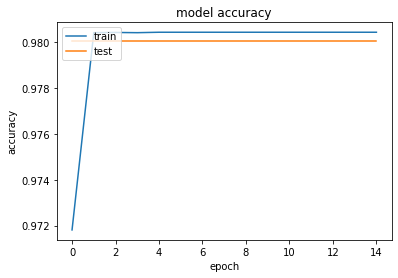

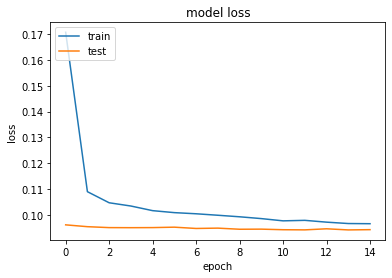

In [515]:
plt.plot(history_6.history['dense_88_accuracy'])
plt.plot(history_6.history['val_dense_88_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history_6.history['dense_88_loss'])
plt.plot(history_6.history['val_dense_88_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [516]:
pred_6 = model_6.predict(X_test)
dict_test_6 = {label[i] : [1 if k[0] >= 0.5 else 0 for k in pred_5[i] ] for i in range(len(label))}
pred_6_df = pd.DataFrame(dict_test_6)
predictions_6 = pred_6_df[['ไลฟ์สไตล์', 'เศรษฐกิจ', 'ต่างประเทศ', 'ความมั่นคง', 'สิ่งแวดล้อม', 'ผู้หญิง', 'การเมือง', 'แรงงาน', 'สังคม', 'อาชญากรรม', 'บันเทิง', 'สิทธิมนุษยชน', 'การศึกษา', 'วิทยาศาสตร์เทคโนโลยี', 'คุณภาพชีวิต', 'วัฒนธรรม', 'กีฬา']].values

In [517]:
print(classification_report(y_test, predictions_6))

              precision    recall  f1-score   support

           0       0.84      0.67      0.75      2305
           1       0.81      0.64      0.71      5437
           2       0.91      0.80      0.85      6506
           3       0.00      0.00      0.00       653
           4       0.74      0.55      0.63      3168
           5       0.72      0.51      0.60      1261
           6       0.85      0.83      0.84     14636
           7       0.83      0.21      0.33       814
           8       0.73      0.46      0.57      8917
           9       0.83      0.77      0.80      5219
          10       0.94      0.89      0.92      3617
          11       0.66      0.35      0.46      3703
          12       0.00      0.00      0.00       701
          13       0.86      0.39      0.54      1847
          14       0.56      0.10      0.17      2812
          15       0.00      0.00      0.00      1141
          16       0.98      0.97      0.98      6587

   micro avg       0.84   

C:\Users\Cromagnon-PC\anaconda3\envs\tf2.4gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Cromagnon-PC\anaconda3\envs\tf2.4gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Cromagnon-PC\anaconda3\envs\tf2.4gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [454]:
actual_df = pd.DataFrame(y_test, columns = ['ไลฟ์สไตล์', 'เศรษฐกิจ', 'ต่างประเทศ', 'ความมั่นคง', 'สิ่งแวดล้อม', 'ผู้หญิง', 'การเมือง', 'แรงงาน', 'สังคม', 'อาชญากรรม', 'บันเทิง', 'สิทธิมนุษยชน', 'การศึกษา', 'วิทยาศาสตร์เทคโนโลยี', 'คุณภาพชีวิต', 'วัฒนธรรม', 'กีฬา'])

In [457]:
actual_df.to_csv("Actual_testing data.csv")

In [518]:
pred_6_df.to_csv("Bi-LSTM_Glove_testing data_new.csv")

In [443]:
model_6.save('Bi-LSTM_Glove_model.h5')
model_6.save_weights("Bi-LSTM_Glove_weight.h5")

# Show Case

In [459]:
# import result data
result_data = pd.read_csv('data_for_result_DL.csv')

In [460]:
result_data

,type,body_cln,Text_Tkn,ต่างประเทศ,เศรษฐกิจ,วัฒนธรรม,การศึกษา,ความมั่นคง,คุณภาพชีวิต,อาชญากรรม,สิทธิมนุษยชน,สิ่งแวดล้อม,กีฬา,สังคม,บันเทิง,การเมือง,filter
0,"สิทธิมนุษยชน,ไอซีที",โดยล่าสุดถูกปั่นว่าเรียกร้องให้สังคมให้อภัยเป...,โดย ล่าสุด ถูก ปั่น ว่า เรียกร้อง ให้ สังคม ให...,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,"กีฬา,ฟุตบอลยุโรป",สำนักข่าวต่างประเทศรายงานวันที่ ก ย ว่า หลังจา...,สำนัก ข่าวต่างประเทศ รายงาน วันที่ ก ย ว่า หลั...,0,0,0,0,0,0,0,0,0,1,0,0,0,1
2,"ข่าว,อาชญากรรม",ชาวบ้านหมู่ ต บ้านกลาง อ อ่าวลึก จ กระบี่ ออกม...,ชาวบ้าน หมู่ ต บ้าน กลาง อ อ่าว ลึก จ กระบี่ อ...,0,0,0,0,0,0,1,0,0,0,0,0,0,1
3,"การเมือง,สังคม",ชี้ถ้าไม่ยกเลิกองค์ประกอบอย่างมาตรา ไทยก็ไม่ม...,ชี้ ถ้า ไม่ ยกเลิก องค์ประกอบ อย่าง มาตรา ไทย ...,0,0,0,0,0,0,0,0,0,0,1,0,1,2
4,เศรษฐกิจ,นายนิพนธ์ วงษ์ตระหง่าน อดีตผู้อำนวยการองค์การค...,นาย นิพนธ์ วงษ์ ตระหง่าน อดีต ผู้อำนวยการ องค์...,0,1,0,0,0,0,0,0,0,0,0,0,0,1
5,"ข่าว,อาชญากรรม",เมื่อเวลา น วันที่ มิ ย ร ต อ อิสระ แสงสว่าง ร...,เมื่อ เวลา น วันที่ มิ ย ร ต อ อิสระ แสงสว่าง ...,0,0,0,0,0,0,1,0,0,0,0,0,0,1
6,"สิ่งแวดล้อม,สังคม",มาปลูกพืชผลและไม้ยืนต้นสารพัดในที่ดิน ไร่ ที่...,มา ปลูก พืชผล และ ไม้ยืนต้น สารพัด ใน ที่ดิน ไ...,0,0,0,0,0,0,0,0,1,0,1,0,0,2
7,"บันเทิง,ข่าวบันเทิง",แอริน ยุกตะทัต หลังเลิกรากับแฟนหนุ่ม นาฑี โอสถ...,แอ ริน ยุ ก ตะ ทัต หลัง เลิกรา กับ แฟน หนุ่ม น...,0,0,0,0,0,0,0,0,0,0,0,1,0,1
8,"ข่าว,การเมือง",วันที่ ก พ ที่บ้านชิดชอบ เลขที่ หมู่ ต อิสาณ อ...,วันที่ ก พ ที่ บ้าน ชิด ชอบ เลขที่ หมู่ ต อิ ส...,0,0,0,0,0,0,0,0,0,0,0,0,1,1
9,"ข่าว,อาชญากรรม",วานนี้ ส ค พ ต อ เชาว์ศิลป์ บุญประดิษฐ์ รอง ผบ...,วาน นี้ ส ค พ ต อ เชาว์ ศิลป์ บุญ ประดิษฐ์ รอง...,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [462]:
X_result = result_data['Text_Tkn'].values

In [466]:
result_data.columns

Index(['type', 'body_cln', 'Text_Tkn', 'ต่างประเทศ', 'เศรษฐกิจ', 'วัฒนธรรม',
       'การศึกษา', 'ความมั่นคง', 'คุณภาพชีวิต', 'อาชญากรรม', 'สิทธิมนุษยชน',
       'สิ่งแวดล้อม', 'กีฬา', 'สังคม', 'บันเทิง', 'การเมือง', 'filter'],
      dtype='object')

In [471]:
lable_result = ['ต่างประเทศ', 'เศรษฐกิจ', 'วัฒนธรรม',
       'การศึกษา', 'ความมั่นคง', 'คุณภาพชีวิต', 'อาชญากรรม', 'สิทธิมนุษยชน',
       'สิ่งแวดล้อม', 'กีฬา', 'สังคม', 'บันเทิง', 'การเมือง']

In [525]:
y_result = result_data[['ต่างประเทศ', 'เศรษฐกิจ', 'วัฒนธรรม',
       'การศึกษา', 'ความมั่นคง', 'คุณภาพชีวิต', 'อาชญากรรม', 'สิทธิมนุษยชน',
       'สิ่งแวดล้อม', 'กีฬา', 'สังคม', 'บันเทิง', 'การเมือง']]

In [530]:
y_result.shape

(58, 13)

In [468]:
X_result = tokenizer.texts_to_sequences(X_result)
X_result = pad_sequences(X_result, padding='post', maxlen=maxlen)

In [481]:
pred_result = model_1.predict(X_result)


In [519]:
pred_result_bool = pred_result > 0.5


In [524]:
predictions_result = pred_result_bool.astype(int)

In [ ]:
from keras.models import load_model

# load model
model = load_model('.h5')
# summarize model.
model.summary()

In [ ]:
lstm_nopretrain.load("")

In [532]:
# import result data
showcase_data = pd.read_csv('data_for_showcase_DL.csv')

In [533]:
showcase_data

,title,body,url,body_cln,Text_Tkn
0,วิษณุ ยันโรดแม็ปเดิม ตอบไม่ถูกเวลาเลือกตั้ง ต...,เมื่อวันที่ 6 ม.ค.60 ที่ทำเนียบรัฐบาล นายวิษณุ...,https://www.thairath.co.th/content/829502,เมื่อวันที่ ม ค ที่ทำเนียบรัฐบาล นายวิษณุ เครื...,เมื่อ วันที่ ม ค ที่ ทำเนียบรัฐบาล นาย วิษณุ เ...
1,แชมป์โลก 2018,พ่ายสวีเดนด้วยประตูรวม 0–1 ตกรอบเพลย์ออฟไปอย่...,https://www.thairath.co.th/sport/eurofootball/...,พ่ายสวีเดนด้วยประตูรวม ตกรอบเพลย์ออฟไปอย่างน...,พ่าย สวีเดน ด้วย ประตู รวม ตกรอบ เพลย์ ออฟ ไป ...
2,ลุยเจาะไข่แดงตลาดใหม่ พาณิชย์ การันตีปนี้ส่งออ...,"ด้านฮาลาล ธนาคารพาณิชย์ร่วมมือกันดันส่งออก,นาง...",https://www.thairath.co.th/content/594241,ด้านฮาลาล ธนาคารพาณิชย์ร่วมมือกันดันส่งออกนางอ...,ด้าน ฮาลาล ธนาคารพาณิชย์ ร่วมมือ กัน ดัน ส่งออ...
3,เกร็ดข่าวลูกหนัง 16/05/58,เซบีญา ยังคงโชว์ฟอร์มยอดเยี่ยมสมราคาแชมป์เก่า ...,https://www.thairath.co.th/content/499085,เซบีญา ยังคงโชว์ฟอร์มยอดเยี่ยมสมราคาแชมป์เก่า ...,เซ บี ญา ยังคง โชว์ ฟอร์ม ยอดเยี่ยม สมราคา แชม...
4,MERCEDES BENZ เปิดตัว MAYBACH S500 2015 รถหรู...,6 สิงหาคม 2558 Mercedes Benz ตอกย้ำภาพลักษณ์คว...,https://www.thairath.co.th/content/516621,สิงหาคม Mercedes Benz ตอกย้ำภาพลักษณ์ความเป็น...,สิงหาคม Mercedes Benz ตอกย้ำ ภาพลักษณ์ ความเป็...
...,...,...,...,...,...
98,นายกฯ ยัน ไม่พบอุยกูร์ดอดเข้าไทย โยก พล.ท.นักร...,เมื่อเวลา 11.00 น. วันที่ 21 เมษายน ที่ทำเนียบ...,https://www.thairath.co.th/content/608927,เมื่อเวลา น วันที่ เมษายน ที่ทำเนียบรัฐบาล พล ...,เมื่อ เวลา น วันที่ เมษายน ที่ ทำเนียบรัฐบาล พ...
99,สมบัติ ยัน ไร้ทาบนั่ง ปธ.กมธ.ยกร่างรธน.ชุดใหม่...,วันที่ 9 ก.ย. ศาสตราจารย์ ดร.สมบัติ ธำรงธัญวงศ...,https://www.thairath.co.th/content/524125,วันที่ ก ย ศาสตราจารย์ ดร สมบัติ ธำรงธัญวงศ์ อ...,วันที่ ก ย ศาสตราจารย์ ดร สมบัติ ธำรง ธัญ วงศ์...
100,ประเทศกูมี,ประเทศที่เสือดำหน้าคะมำเพราะไรเฟิล\nประเทศที่พ...,https://www.musicsupport.shop/article/49/%E0%B...,ประเทศที่เสือดำหน้าคะมำเพราะไรเฟิลประเทศที่พล่...,ประเทศ ที่ เสือดำ หน้า คะมำ เพราะ ไรเฟิล ประเท...
101,พ่อฉันเป็นกรรมกร,ทุกครั้งที่ท้องหยุดหิว\nทุกครั้งที่หิว ฉันคิดถ...,https://www.google.com/search?q=%E0%B8%9E%E0%B...,ทุกครั้งที่ท้องหยุดหิวทุกครั้งที่หิว ฉันคิดถึง...,ทุกครั้งที่ ท้อง หยุด หิว ทุกครั้งที่ หิว ฉัน ...


In [534]:
X_showcase = showcase_data['Text_Tkn'].values

In [535]:
X_showcase = tokenizer.texts_to_sequences(X_showcase)
X_showcase = pad_sequences(X_showcase, padding='post', maxlen=maxlen)

In [559]:
pred_showcase = model_1.predict(X_showcase)
pred_showcase_bool = pred_showcase > 0.5
predictions_showcase = pred_showcase_bool.astype(int)

TypeError: '>' not supported between instances of 'list' and 'float'

In [538]:
predictions_showcase_df = pd.DataFrame(predictions_showcase, columns = ['ไลฟ์สไตล์', 'เศรษฐกิจ', 'ต่างประเทศ', 'ความมั่นคง', 'สิ่งแวดล้อม', 'ผู้หญิง', 'การเมือง', 'แรงงาน', 'สังคม', 'อาชญากรรม', 'บันเทิง', 'สิทธิมนุษยชน', 'การศึกษา', 'วิทยาศาสตร์เทคโนโลยี', 'คุณภาพชีวิต', 'วัฒนธรรม', 'กีฬา'])

In [539]:
predictions_showcase_df

,ไลฟ์สไตล์,เศรษฐกิจ,ต่างประเทศ,ความมั่นคง,สิ่งแวดล้อม,ผู้หญิง,การเมือง,แรงงาน,สังคม,อาชญากรรม,บันเทิง,สิทธิมนุษยชน,การศึกษา,วิทยาศาสตร์เทคโนโลยี,คุณภาพชีวิต,วัฒนธรรม,กีฬา
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
99,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
100,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
101,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [574]:
# import result data
showcase_data_ml = pd.read_csv('result_showcase_cvt.csv')

In [575]:
showcase_data_ml

,Unnamed: 0,body,Predict
0,0,เมื่อวันที่ 6 ม.ค.60 ที่ทำเนียบรัฐบาล นายวิษณุ...,การเมือง
1,1,พ่ายสวีเดนด้วยประตูรวม 0–1 ตกรอบเพลย์ออฟไปอย่...,กีฬา
2,2,"ด้านฮาลาล ธนาคารพาณิชย์ร่วมมือกันดันส่งออก,นาง...",เศรษฐกิจ
3,3,เซบีญา ยังคงโชว์ฟอร์มยอดเยี่ยมสมราคาแชมป์เก่า ...,กีฬา
4,4,6 สิงหาคม 2558 Mercedes Benz ตอกย้ำภาพลักษณ์คว...,วิทยาศาสตร์เทคโนโลยี
...,...,...,...
98,98,เมื่อเวลา 11.00 น. วันที่ 21 เมษายน ที่ทำเนียบ...,การเมือง
99,99,วันที่ 9 ก.ย. ศาสตราจารย์ ดร.สมบัติ ธำรงธัญวงศ...,การเมือง
100,100,ประเทศที่เสือดำหน้าคะมำเพราะไรเฟิล\nประเทศที่พ...,การเมือง
101,101,ทุกครั้งที่ท้องหยุดหิว\nทุกครั้งที่หิว ฉันคิดถ...,การเมือง


In [588]:
def thai_tokenizer(text):
    from pythainlp.tokenize import word_tokenize
    return word_tokenize(text, keep_whitespace=False)

def remove_repettition(text):
    token_list = list(text)
    if len(token_list) > 2:
        filter_list = [True, True]
        n = len(token_list)
        for i in range(2, n):
            if (token_list[i] == token_list[i-1]) and (token_list[i] == token_list[i-2]):
                filter_list.append(False)
            else:
                filter_list.append(True)

        output = ''.join(np.array(token_list)[filter_list])
    else:
        output = text
    return output

def cleansing(text):
    # \t, \n, \xa0 and other special characters. Replace by blank string
    text = re.sub('[\t\n\xa0\"\'!?\/\(\)%\:\=\-\+\*\_ๆ#$&,<>]', '', text)
    
    # Numbers. Replace by space
    text = re.sub('[0-9]', ' ', text)
    
    # Dot. Replace by space
    text = re.sub('[\.]', ' ', text)
    
    # One or more consecutive space. Replace by single space
    text = re.sub('\s+',' ',text)
    
    # Remove 2 or more repettition
    text = remove_repettition(text)
    test_string = text
    pattern = re.compile(r"[^\u0E00-\u0E7Fa-zA-Z' ]|^'|'$|''")
    char_to_remove = re.findall(pattern, test_string)
    list_with_char_removed = [char for char in test_string if not char in char_to_remove]
    result_string = ''.join(list_with_char_removed)
    return result_string

In [589]:
from pythainlp.tokenize import word_tokenize
def tknzt(wrd) :
  ttkn =  word_tokenize(wrd,engine="newmm")
  return " ".join([i for i in ttkn if i.strip() != ""])

In [638]:
tt = "ประเทศที่แจกเก้าอี้เป็นคำตอบ"

In [639]:
tj = tknzt(tt)

In [640]:
list_tj = [tj]
tj 

In [641]:
list_tj

['ประเทศ ที่ แจก เก้าอี้ เป็น คำตอบ']

In [642]:
X_showcase_r = tokenizer.texts_to_sequences(list_tj)
X_showcase_r = pad_sequences(X_showcase_r, padding='post', maxlen=maxlen)

In [643]:
X_showcase_r

array([[  42,    2, 1568, 2616,   11, 1434,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0, 

In [644]:
pred_showcase_r = model_1.predict(X_showcase_r)
pred_showcase_bool_r = pred_showcase_r > 0.5
predictions_showcase_r = pred_showcase_bool_r.astype(int)

In [645]:
predictions_showcase_r 

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [629]:
i = 0
print(showcase_data["body"][i])
print(".................................................")
predictions_showcase_df.iloc[predictions_showcase_df.index==i]
print("ML prediction")
print(showcase_data_ml["Predict"].iloc[showcase_data_ml.index==i])
print(".................................................")
print("DL prediction")
predictions_showcase_df.iloc[predictions_showcase_df.index==i]

เมื่อวันที่ 6 ม.ค.60 ที่ทำเนียบรัฐบาล นายวิษณุ เครืองาม รองนายกรัฐมนตรี กล่าวถึงกรณี ที่ นายสุรชัย เลี้ยงบุญเลิศชัย รองประธานสภานิติบัญญัติแห่งชาติ (สนช.) ออกมาระบุว่า การเลือกตั้งจะถูกเลื่อนออกไปถึงปี 2561 ว่า ขอให้ไปสอบถามกับ สนช. แต่เชื่อว่าคงไม่กล้าพูดอีก เพราะทำให้คนเข้าใจผิด ซึ่งที่ สนช.พูดเนื่องจากผูกกับกฎหมายของกรรมการร่างรัฐธรรมนูญ(กรธ.) ตนจึงไม่ขอวิพากษ์วิจารณ์ แต่รัฐบาลยืนยันว่ายังเดินตามโรดแม็ป ซึ่งโรดแม็ปมองได้สองแบบ คือ มีลำดับขั้นตอนและการกำหนดช่วงเวลา โดยเริ่มต้นจากการประกาศใช้รัฐธรรมนูญ แต่ขณะนี้รัฐธรรมนูญยังไม่ประกาศใช้ จึงยังเริ่มนับหนึ่งไม่ถูก จากนั้นเข้าสู่ขั้นตอนการร่างกฎหมายประกอบร่างรัฐธรรมนูญหรือกฎหมายลูก ภายใน 240 วัน ก่อนจะส่งกลับให้ สนช.พิจารณา ภายใน 2 เดือน ,นายวิษณุ กล่าวต่อว่า หากมีการแก้ไขก็จะมีการพิจารณาร่วมกับ กรธ.อีก 1 เดือน ก่อนนำขึ้นทูลเกล้าฯ ทรงลงพระปรมาภิไธย ภายใน 90 วัน และจะเข้าสู่การเลือกตั้งภายในระยะเวลา 5 เดือน ซึ่งทั้งหมดนี้คือโรดแม็ปที่ยังเป็นแบบเดิมอยู่ ส่วนเดิมที่กำหนดวันเลือกตั้งไว้ภายในปี 60 นั้น เพราะมาจากสมมติฐานของขั้นตอนเดิมทั้งหมด 

,ไลฟ์สไตล์,เศรษฐกิจ,ต่างประเทศ,ความมั่นคง,สิ่งแวดล้อม,ผู้หญิง,การเมือง,แรงงาน,สังคม,อาชญากรรม,บันเทิง,สิทธิมนุษยชน,การศึกษา,วิทยาศาสตร์เทคโนโลยี,คุณภาพชีวิต,วัฒนธรรม,กีฬา
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
